# Modelos de Crescimento Econômico: **Modelo de Solow** 

Vamos recriar os resultados de uns dos artigos mais famosos na teoria de crescimento econômico: [Mankiw, Romer e Weil (1992)](https://eml.berkeley.edu/~dromer/papers/MRW_QJE1992.pdf). (MRW).

Em geral, testes empíricos não costumam ser favoráveis à hipótese de convergência de renda entre todos os países, o que gerou uma literatura tentando entender quais as causas dessa não-convergência.

Para isso, MRW colocam também o capital humano como um fator de produção, tirando conclusões favoráveis ao modelo de Solow no quesito de explicação de diferença de renda entre os países e quanto à convergência.

----

## Leitura dos Dados

In [1]:
## Atualizando scipy
from IPython.display import clear_output # limpa o output de uma célula
!pip uninstall scipy -y
!pip install scipy

clear_output()  # limpando o texto

In [26]:
## Importando o que for necessário
# Manipulação de dados
import pandas as pd
import numpy as np

# Testes e Regressões
from scipy import stats
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from patsy import dmatrices

# Gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
## Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Lendo os dados
sCaminho = "/content/drive/Othercomputers/Meu modelo MacBook Air/Documents/IPEA/Curso IDP/Disciplina 3 - Crescimento Econômico/Dados/"
sArquivo = "mrw.csv"

## Lendo o DataFrame
data = pd.read_csv(f"{sCaminho}{sArquivo}")

# Vendo o tamanho da base
print(f"Linhas: {data.shape[0]}; Colunas: {data.shape[1]}")

Linhas: 121; Colunas: 11


In [5]:
## Vendo o DataFrame
data.head(10)

# n: dummy que indica se o petróleo não é a indústria dominante no país
# i: dummy que indica se o país tem menos de 1 milhão de habitantes em 1960
# o: dummy que indica se o país faz parte da OCDE
# As estimativas dos autores são feitas com os três grupos de países para testar robustez

# rgpdw60: PIB real por população em idade ativa em 1960
# rgpdw85: PIB real por população em idade ativa em 1985
# gdpgrowth: taxa média de crescimento (%) do PIB entre 1960 e 1985
# popgrowth: taxa média de crescimento (%) da população entre 1960 e 1985
# i_y: taxa de investimento média (1960 a 1985) = total investido/PIB
# school: proxy para capital humano (percentual da população em idade ativa que está no ensino fundamental)

,number,country,n,i,o,rgdpw60,rgdpw85,gdpgrowth,popgrowth,i_y,school
0,1,Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.1,4.5
1,2,Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.8,1.8
2,3,Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.8,1.8
3,4,Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.3,2.9
4,5,Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.7,0.4
5,6,Burundi,1,0,0,755.0,663.0,1.2,1.7,5.1,0.4
6,7,Cameroon,1,1,0,889.0,2190.0,5.7,2.1,12.8,3.4
7,8,Central Afr. Rep.,1,0,0,838.0,789.0,1.5,1.7,10.5,1.4
8,9,Chad,1,0,0,908.0,462.0,-0.9,1.9,6.9,0.4
9,10,"Congo,",1,0,0,1009.0,2624.0,6.2,2.4,28.8,3.8


In [6]:
## Descrevendo o DataFrame
data.describe(include='all')

,number,country,n,i,o,rgdpw60,rgdpw85,gdpgrowth,popgrowth,i_y,school
count,121.000000,121,121.000000,121.000000,121.000000,116.000000,108.000000,117.000000,107.000000,121.000000,118.000000
unique,NaN,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,61.000000,NaN,0.809917,0.619835,0.181818,3681.818966,5683.259259,4.094017,2.279439,18.157025,5.526271
std,35.073732,NaN,0.393998,0.487446,0.387298,7492.877637,5688.670819,1.891464,0.998748,7.853310,3.532037
min,1.000000,NaN,0.000000,0.000000,0.000000,383.000000,412.000000,-0.900000,0.300000,4.100000,0.400000
25%,31.000000,NaN,1.000000,0.000000,0.000000,973.250000,1209.250000,2.800000,1.700000,12.000000,2.400000
50%,61.000000,NaN,1.000000,1.000000,0.000000,1962.000000,3484.500000,3.900000,2.400000,17.700000,4.950000
75%,91.000000,NaN,1.000000,1.000000,0.000000,4274.500000,7718.750000,5.300000,2.900000,24.100000,8.175000


### Formatando os dados

In [7]:
## Tirando número do países
data.drop(["number"], axis=1, inplace=True)

## Colocando país como index
data.set_index('country', inplace=True)
data

,n,i,o,rgdpw60,rgdpw85,gdpgrowth,popgrowth,i_y,school
country,,,,,,,,,
Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.1,4.5
Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.8,1.8
Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.8,1.8
Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.3,2.9
Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.7,0.4
...,...,...,...,...,...,...,...,...,...
Australia,1,1,1,8440.0,13409.0,3.8,2.0,31.5,9.8
Fiji,0,0,0,3634.0,NaN,4.2,NaN,20.6,8.1
Indonesia,1,1,0,879.0,2159.0,5.5,1.9,13.9,4.1


In [8]:
### Criando outras variáveis

## Log da taxa de crescimento da população (n) + taxa crescimento PIB (g) + depreciação anual (d)
# No artigo seminal de MRW, eles consideram que a taxa de crescimento é constante entre os países e igual a 0,02
# O mesmo vale para a taxa de depreciação, tomada como 0,03.
# prefixo l: log!
data['lngd'] = np.log(data['popgrowth'] / 100 + 0.02 + 0.03)

## Log da taxa de investimento
data['ls'] = np.log(data['i_y'] / 100)

## Constante
data['const'] = 1

## Log investimento - Log ∑(taxas)
data['ls_lngd'] = data['ls'] - data['lngd']

In [9]:
## Criando mais variáveis logaritmizadas
# Log da proxy de capital humano
data['lschool'] = np.log(data['school'] / 100)

# Diferença dos logs de capital humano e (n + g +d)
data['lschool_lngd'] = data['lschool'] - data['lngd']

# Log dos PIBs por pessoas em idade ativa em cada ano
data['ly60'] = np.log(data['rgdpw60'])
data['ly85'] = np.log(data['rgdpw85'])
data['linv'] = np.log(data['i_y'])

## Criando variável de taxa de crescimento (≈ diferença dos logs)
data["taxa_crescimento"] = data["ly85"] - data["ly60"]

In [10]:
## Criando DataFrames diferentes para cada grupo de países
# Países sem dominância de petróleo
data_sem_petroleo = data.query("n == 1")

# Com menos de 1 milhão de habitantes em 1960
data_baixa_pop = data.query("i == 1")

# OCDE
data_ocde = data.query("o == 1")

## O Modelo Tradicional de Solow

### Um pouco de teoria

Os autores buscam saber se países com maiores taxas de poupança (s) - que, na economia, deve ser igual ao investimento - e menores valores (n + g + d) possuem maiores PIB per capita.

Mas... por que essas variáveis? Em virtude do **Modelo de Solow**

O modelo começa com uma função do tipo Cobb-Douglas: 

\begin{align*}
Y(t) = K(t)^{\alpha}(A(t)L(t))^{1 - \alpha},
\end{align*}

onde $\alpha$ é a participação do capital no produto e $1 - \alpha$ é a participação do fator trabalho.

A derivada (evolução temporal) do capital é determinada pela **Equação Fundamental de Solow**:

\begin{align*}
\dot{k(t)} = sk(t)^{\alpha} - (n - g - \delta)k(t)
\end{align*}

Pela teoria de Cálculo, maximizamos o nível de capital quando sua derivada é 0. Igualando à equação acima a 0, pode-se encontrar o **capital do steady-state** $k(t)^*$:

\begin{align*}
k(t)^* = \left(\frac{s}{n + g + \delta}\right)^{1/(1 - \alpha)}
\end{align*}

Feito isso, podemos substituir $k(t)^*$ na função de produção, colocá-la em termos per capita e logaritmizá-la:

\begin{align*}
log(Y/L) = A + \frac{\alpha}{(1 - \alpha)}log(s) - \frac{\alpha}{(1 - \alpha)}log(n + g + \delta)
\end{align*}

### Regressões

#### Modelo Simples

In [11]:
## Definindo formula
formula = "ly85 ~ ls + lngd"

# Países sem petróleo
reg1 = ols(formula=formula, data=data_sem_petroleo).fit()

# Países com baixa população
reg2 = ols(formula=formula, data=data_baixa_pop).fit()

# Países da OCDE
reg3 = ols(formula=formula, data=data_ocde).fit()

In [12]:
## Criando tabela com o resultado dos três modelos
# Criando um dicionário com os resultados que queremos que apareça
info_dict = {'R^2': lambda x: x.rsquared,
            'N': lambda x: x.nobs,
            "P-valor F": lambda x: x.f_pvalue}

resultados_iniciais = summary_col(results = [reg1, reg2, reg3],
                                  float_format='%0.3f',
                                  stars = True,
                                  model_names = ['Sem Petróleo',
                                                'Baixa População',
                                                'OCDE'],
                                  info_dict = info_dict,
                                  regressor_order=["ls", "lngd", "Intercept"])

print(resultados_iniciais)


          Sem Petróleo Baixa População   OCDE  
-----------------------------------------------
ls        1.424***     1.318***        0.500   
          (0.143)      (0.171)         (0.434) 
lngd      -1.990***    -2.017***       -0.742  
          (0.563)      (0.534)         (0.852) 
Intercept 5.430***     5.346***        8.021***
          (1.584)      (1.543)         (2.518) 
R^2       0.6009       0.5989          0.1059  
N         98.0000      75.0000         22.0000 
P-valor F 0.0000       0.0000          0.3452  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Os autores tiram duas conclusões das regressões acima: nas duas primeiras amostras, a taxa de poupança tem efeito positivo sobre o PIB por trabalho, sendo esse efeito insignificante nos países de maior renda (OCDE), o que pode sugerir convergências.

Além disso, o modelo consegue captar/prever bem os resultados, possuindo R^2 de cerca de 0,60. Novamente, isso não ocorre com os países mais ricos.

Por fim, como indica o modelo, (n + g + d) tem efeito negativo sobre o PIB por trabalhador.


#### Testando coeficientes: será que os coeficientes do 1º modelo são iguais, como prega o modelo?

In [13]:
## Contudo, note que, pela equação de log (Y/L), os coeficientes de ls e lngd deveriam ser tais que βls =-βlngd, ou seja,
## em módulo, iguais a α / (1 - α). Será que eles são mesmo iguais?

# Para fazer o teste, usamos o método wald_test dos modelos, em que H0: coeficientes iguais
# Para o modelo 1 (sem petróleo):
reg1.wald_test("ls = lngd")

# Rejeitamos a hipótese nula de que os coeficientes são iguais, o que vai contra a teoria

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[39.90561043]]), p=8.54662888874153e-09, df_denom=95, df_num=1>

In [14]:
# Para o modelo 2 (baixa população):
reg2.wald_test("ls = lngd")

# Mesma interpretação do modelo anterior

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[44.48537699]]), p=4.466335704091754e-09, df_denom=72, df_num=1>

In [15]:
# Para o modelo 3 (OCDE):
reg3.wald_test("ls = lngd")

# Aqui, não podemos rejeitar a hipótese de igualdade dos coeficientes
# Ironicamente, é justamente o modelo não significante o único a seguir a teoria

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.79689589]]), p=0.19589763808841787, df_denom=19, df_num=1>

In [16]:
## Para impor a restrição de igualdade de coeficientes (βls =-βlngd), juntamos
## ls - lngd em uma só variável: ls_lngd, que já criamos

## Definindo formula
formula = "ly85 ~ ls_lngd"

# Países sem petróleo
regr1 = ols(formula=formula, data=data_sem_petroleo).fit()

# Países com baixa população
regr2 = ols(formula=formula, data=data_baixa_pop).fit()

# Países da OCDE
regr3 = ols(formula=formula, data=data_ocde).fit()

In [17]:
## Criando tabela com o resultado dos três modelos
# Note que esse coeficiente deve ser igual a α / (1- α), de forma que podemos,
# implicitamente, calcular a participação do capital no produto
info_dict1 = {'R^2': lambda x: x.rsquared,
            'N': lambda x: x.nobs,
            "P-valor F": lambda x: x.f_pvalue,
            "α Implícito": lambda x: f"{np.around(x.params[1]/(1 + x.params[1]), 2)}"}

resultados_iniciais1 = summary_col(results = [regr1, regr2, regr3],
                                  float_format='%0.3f',
                                  stars = True,
                                  model_names = ['Sem Petróleo',
                                                'Baixa População',
                                                'OCDE'],
                                  info_dict = info_dict1,
                                  regressor_order=["ls_lngd", "Intercept"])

print(resultados_iniciais1)


            Sem Petróleo Baixa População   OCDE  
-------------------------------------------------
ls_lngd     1.488***     1.431***        0.554   
            (0.125)      (0.139)         (0.365) 
Intercept   6.872***     7.093***        8.624***
            (0.121)      (0.146)         (0.533) 
R^2         0.5974       0.5917          0.1031  
N           98.0000      75.0000         22.0000 
P-valor F   0.0000       0.0000          0.1451  
α Implícito 0.6          0.59            0.36    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Apesar de os resultados corroborarem o modelo de Solow, os $\alpha$ calculados, com exceção do modelo não significante da OCDE, não estão de acordo com a literatura do tema, que diz que essa taxa é de cerca de 0,33.

Dessa forma, esses resultados de MRW ainda não corroboram o modelo de Solow. Para seguir com a pesquisa, eles sugerem **aumentar o modelo**, adicionando não só o capital físico já presente, mas também o *capital humano*.

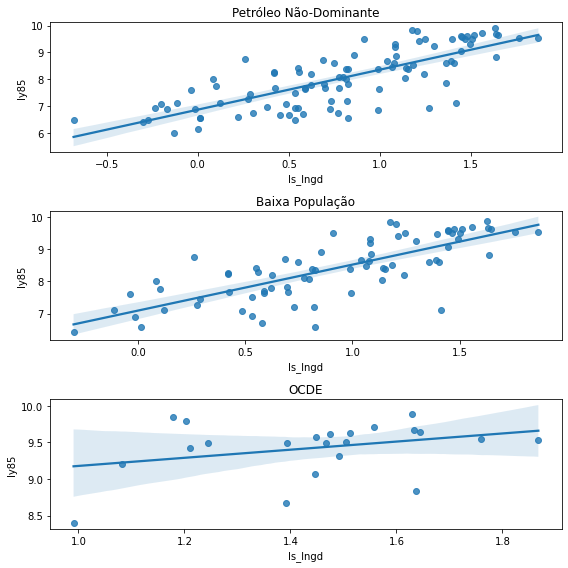

In [39]:
## Podemos ver os resultados graficamente usando o lm do seaborn
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))

# Países onde o petróleo não é a indústria dominante
ax0 = sns.regplot(x="ls_lngd", y="ly85", data=data_sem_petroleo, ax=ax[0])
ax0.title.set_text("Petróleo Não-Dominante")

# Países com baixa população
ax1 = sns.regplot(x="ls_lngd", y="ly85", data=data_baixa_pop, ax=ax[1])
ax1.title.set_text("Baixa População")

# Países da OCDE
ax2 = sns.regplot(x="ls_lngd", y="ly85", data=data_ocde, ax=ax[2])
ax2.title.set_text("OCDE")

plt.tight_layout()
plt.show()

## O Modelo de Solow Aumentado com Capital Humano

### Teoria e Equações

Com a adição de capital humano ($h$), a função de produção Cobb Douglas se torna

\begin{align*}
Y(t) = K(t)^{\alpha}H(t)^{\beta}(A(t)L(t))^{1 - \alpha - \beta}
\end{align*}

Analogamente, a evolução dos capitais da economia é determinada por

\begin{align*}
\dot{k(t)} = s_{k}y(t) - (n + g +\delta)k(t)\\
\dot{h(t)} = s_{h}y(t) - (n + g +\delta)h(t)
\end{align*}

Poupando toda a matemática para encontrar os valores ótimos de $k(t)$ e $h(t)$, podemos chegar na equação que vamos estimar para o PIB por trabalhador:

\begin{align*}
log(Y(t)/L(t)) = A + \frac{\alpha}{1 - \alpha - \beta}log(s_k) - \frac{\alpha + \beta}{1 - \alpha - \beta}log(n + g + \delta) + \frac{\beta}{1 - \alpha -\beta}log(s_h),
\end{align*}

Podemos separar o termo que multiplica log(n + g + \delta) para encontrarmos melhor nossas restrições de igualdade nos coeficientes:

\begin{align*}
log(Y(t)/L(t)) = A + \frac{\alpha}{1 - \alpha - \beta}log(s_k) - \frac{\alpha}{1 - \alpha - \beta}log(n + g + \delta) + \frac{\beta}{1 - \alpha -\beta}log(s_h) - \frac{\beta}{1 - \alpha - \beta}log(n + g + \delta),
\end{align*}

onde $s_h$ é a fração da renda investida em capital humano e $s_k$ é a fração investida em capital físico.

Como não temos essa separação, tomaremos $s_h$ como a taxa de investimento e usaremos a *proxy school* para o nível de capital humano.

### Regressões

#### Modelo Aumentado Simples

In [18]:
## Definindo formula sem restrições (primeira equação da Teoria)
formula_aumentada = "ly85 ~ ls + lngd + lschool"

# Países sem petróleo
regh1 = ols(formula=formula_aumentada, data=data_sem_petroleo).fit()

# Países com baixa população
regh2 = ols(formula=formula_aumentada, data=data_baixa_pop).fit()

# Países da OCDE
regh3 = ols(formula=formula_aumentada, data=data_ocde).fit()

In [19]:
## Printando os três modelos
resultados_aumentados = summary_col(results = [regh1, regh2, regh3],
                                    float_format='%0.3f',
                                    stars = True,
                                    model_names = ['Sem Petróleo',
                                                  'Baixa População',
                                                  'OCDE'],
                                    info_dict = info_dict,
                                    regressor_order=["ls", "lngd", "lschool", "Intercept"])
print(resultados_aumentados)


          Sem Petróleo Baixa População   OCDE  
-----------------------------------------------
ls        0.697***     0.700***        0.276   
          (0.133)      (0.151)         (0.389) 
lngd      -1.745***    -1.500***       -1.076  
          (0.416)      (0.403)         (0.756) 
lschool   0.654***     0.731***        0.768** 
          (0.073)      (0.095)         (0.293) 
Intercept 6.844***     7.791***        8.637***
          (1.177)      (1.192)         (2.214) 
R^2       0.7856       0.7807          0.3524  
N         98.0000      75.0000         22.0000 
P-valor F 0.0000       0.0000          0.0455  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Modelo Aumentado com Restrição de Igualdade nos Coeficientes

In [20]:
## Novamente, o coeficiente de lngd e ls devem ser iguais pelo modelo e iguais a α / (1-α)
## Pelas equações acima, jávemos que eles são bem diferentes

# Fórmula com restrição (segunda equação da Teoria)
formula_aumentada_restricao = "ly85 ~ ls_lngd + lschool_lngd"

# Países sem petróleo
reghr1 = ols(formula=formula_aumentada_restricao, data=data_sem_petroleo).fit()

# Países com baixa população
reghr2 = ols(formula=formula_aumentada_restricao, data=data_baixa_pop).fit()

# Países da OCDE
reghr3 = ols(formula=formula_aumentada_restricao, data=data_ocde).fit()

In [21]:
## Da mesma forma como fizemos antes, também podemos calcular os α e β implícitos pelos coeficientes
info_dict_aumentado = {'R^2': lambda x: x.rsquared_adj,
                      'N': lambda x: x.nobs,
                      "P-valor F": lambda x: x.f_pvalue,
                      'α Implícito': lambda x: f"{np.around(x.params[1]/(1 + x.params[1] + x.params[2]), 2)}",
                      'β Implícito': lambda x: f"{np.around(x.params[2]/(1 + x.params[1] + x.params[2]), 2)}"}

resultados_aumentados_restricao = summary_col(results = [reghr1, reghr2, reghr3],
                                              float_format='%0.3f',
                                              stars = True,
                                              model_names = ['Sem Petróleo',
                                                            'Baixa População',
                                                            'OCDE'],
                                              info_dict = info_dict_aumentado,
                                              regressor_order=["ls_lngd", "lschool_lngd", "Intercept"])
print(resultados_aumentados_restricao)


             Sem Petróleo Baixa População   OCDE  
--------------------------------------------------
ls_lngd      0.738***     0.709***        0.283   
             (0.124)      (0.138)         (0.334) 
lschool_lngd 0.657***     0.733***        0.769** 
             (0.073)      (0.093)         (0.284) 
Intercept    7.853***     7.966***        8.716***
             (0.140)      (0.154)         (0.466) 
R^2          0.7794       0.7745          0.2841  
N            98.0000      75.0000         22.0000 
P-valor F    0.0000       0.0000          0.0161  
α Implícito  0.31         0.29            0.14    
β Implícito  0.27         0.3             0.37    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Agora, os coeficientes de α e β estão muito mais próximo da realidade, próximo de 30% da renda nacional. Além disso, o Rˆ2 aumentou nos modelos que eram significantes, chegando a 0,77.

Os sinais das variáveis também estão de acordo com a teoria: maiores poupanças levam a maiores PIBs, sendo o mesmo válido para capital humano.

Apesar desses resultados, há ainda muita discussão na literatura. Por exemplo, para que os coeficientes acima tenham efeito causal, é preciso assumir que não há nenhuma variavel omitida no modelo que determina o PIB per capita.

Você consegue pensar em alguma outra coisa que determina a evolução do PIB per capita que não está descrito na equação?

Além disso, há o problema de causalidade reversa: e se não for a poupança que causa maior PIB, mas sim o inverso?

Por fim, pode haver algum erro de medida nas nossas variáveis; em especial, a proxy de capital humano utilizada pode omitir vários outros aspectos importantes.

## A Hipótese da Convergência

Uma das consequências do modelo de Solow é que a função de crescimento do PIB per capita é côncava no tempo, ou seja, quanto maior a renda do país, menor a sua taxa de crescimento. 

Consequentemente, espera-se que países de baixa renda alcancem o nível de desenvolvimento de países mais ricos em algum horizonte no futuro. Será que isso acontece?

In [22]:
## Vamos fazer três regressões para a primeira amostra de países (sem petróleo) com diferentes controles
## A ideia é: se há convergência, níveis maiores de renda em 1960 levariam a menores taxas médias de crescimento entre 1960 e 1985

# Simples
regcon1 = ols(formula="taxa_crescimento ~ 1 + ly60", data=data_sem_petroleo).fit()

# Controles
regcon2 = ols(formula="taxa_crescimento ~ 1 + ly60 + lngd + ls", data=data_sem_petroleo).fit()

# Controles + Capital Humano
regcon3 = ols(formula="taxa_crescimento ~ 1 + ly60 + lngd + ls + lschool", data=data_sem_petroleo).fit()

In [23]:
## Tabela com os resultados
resultados_iniciais_convergencia = summary_col(
    results = [regcon1, regcon2, regcon3],
    float_format='%0.3f',
    stars = True,
    model_names = ['Sem Petróleo',
                  'Baixa População',
                  'OCDE'],
    info_dict = info_dict,
    regressor_order=["ly60", "ls", "lngd", "lschool", "Intercept"]
)

print(resultados_iniciais_convergencia)


          Sem Petróleo Baixa População    OCDE  
------------------------------------------------
ly60      0.094*       -0.141***       -0.288***
          (0.050)      (0.052)         (0.062)  
ls                     0.647***        0.524*** 
                       (0.087)         (0.087)  
lngd                   -0.302          -0.506*  
                       (0.304)         (0.289)  
lschool                                0.231*** 
                                       (0.059)  
Intercept -0.267       1.919**         3.022*** 
          (0.380)      (0.834)         (0.827)  
R^2       0.0363       0.4019          0.4855   
N         98.0000      98.0000         98.0000  
P-valor F 0.0603       0.0000          0.0000   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


Repare que, na primeira regressão o coeficiente do logaritmo do PIB por trabalhador em 1960 ficou positivo e pouco significativo, o que indicaria que não há convergência (não há relação entre o nível de renda e sua taxa de crescimento).

Na segunda regressão o coeficiente ficou negativo e significativo, ou seja, uma vez controlado pela taxa de investimento e por (n+g+d) observa-se um processo de **convergência condicional** (controlado para outras variáveis).

O mesmo procedimento ocorre com maior intensidade no grupo de países mais ricos, o que reforça ainda mais a hipótese da convergência (países mais ricos -> maior nível de renda -> maior efeito negativo sobre a taxa de crescimento).

# Obrigado!